# Загрузка библиотек

In [1]:
%pip install scikit-learn
%pip install pandas
%pip install plotly
%pip install scipy
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# !kaggle datasets download saurabh00007/iriscsv

In [ ]:
import pandas as pd
import plotly.express as px
import scipy.stats as sts
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
from typing import Dict, List, Tuple, Any, Optional
import matplotlib.pyplot as plt

# Загрузка и обработка датафрейма

In [4]:
df = pd.read_csv("data/Iris.csv")
df.all().isna()
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Пропусков данных нету -- это половина победы

# Обработка данных:

## 1. Самый популярный/непопулярный

In [ ]:
count_type_species: pd.Series = df["Species"].value_counts()
must_popular_species: int = count_type_species.max()
least_poplar_species: int = count_type_species.min()
print(must_popular_species, least_poplar_species)

50 50


## 2. Вычисление описательных статистических характеристик:

### Формирование датафреймов

In [ ]:

# df["Species"].unique() -> ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

def area_data(df: pd.DataFrame) -> Tuple[pd.Series, pd.Series]:
    """
    Вычисляет площади чашелистиков и лепестков.
    
    Args:
        df: DataFrame с данными о размерах цветков
        
    Returns:
        Tuple из двух Series: площади чашелистиков и лепестков
    """
    return (df["SepalLengthCm"] * df["SepalWidthCm"], df["PetalLengthCm"]*df["PetalWidthCm"])


df_iris_setosa: pd.DataFrame = df[df['Species'] == "Iris-setosa"].reset_index()
df_iris_versicolor: pd.DataFrame = df[df['Species'] == "Iris-versicolor"].reset_index()
df_iris_virginica: pd.DataFrame = df[df['Species'] == "Iris-virginica"].reset_index()

area_iris_setosa_sepal: pd.Series
area_iris_setosa_petal: pd.Series
area_iris_setosa_sepal, area_iris_setosa_petal = area_data(df_iris_setosa)

area_iris_versicolor_sepal: pd.Series
area_iris_versicolor_petal: pd.Series  
area_iris_versicolor_sepal, area_iris_versicolor_petal = area_data(df_iris_versicolor)

area_iris_virginica_sepal: pd.Series
area_iris_virginica_petal: pd.Series
area_iris_virginica_sepal, area_iris_virginica_petal = area_data(df_iris_virginica)

area_all_flowers_sepal: pd.Series
area_all_flowers_petal: pd.Series
area_all_flowers_sepal, area_all_flowers_petal = area_data(df)

# Sepal and Petal
area_iris_setosa_sepal_petal: pd.Series = pd.concat([area_iris_setosa_sepal,area_iris_setosa_petal], ignore_index=True)
area_iris_versicolor_sepal_petal: pd.Series = pd.concat([area_iris_versicolor_sepal, area_iris_versicolor_petal], ignore_index=True)
area_iris_virginica_sepal_petal: pd.Series = pd.concat([area_iris_virginica_sepal, area_iris_virginica_petal], ignore_index=True)
area_all_flowers_sepal_petal: pd.Series = pd.concat([area_all_flowers_sepal, area_all_flowers_petal], ignore_index=True)



### Вычисление описательных статистик

In [ ]:
def make_table_sts(sepal: pd.Series, petal: pd.Series, sepal_petal: pd.Series, name: str) -> pd.DataFrame:
    """
    Создает таблицу описательных статистик.
    
    Args:
        sepal: Series с площадями чашелистиков
        petal: Series с площадями лепестков  
        sepal_petal: Series с объединенными площадями
        name: Название вида для таблицы
        
    Returns:
        DataFrame с описательными статистиками
    """
    df_area: pd.Series = pd.Series([
        sepal,
        petal,
        sepal_petal,
    ])

    df_e: pd.Series = df_area.apply(pd.Series.mean)
    df_var: pd.Series = df_area.apply(pd.Series.var)
    df_med: pd.Series = df_area.apply(pd.Series.median)
    df_q_2_5: pd.Series = df_area.apply(pd.Series.quantile, q=2/5)

    df_e.index = [
        "Sepal area",
        "Petal area",
        "Sepal and Petal area"
    ]

    df_sts: pd.DataFrame = df_e.to_frame(name="E(x)").reset_index().rename(columns= {"index": name})
    df_sts["Var(x)"] = df_var
    df_sts["Med(x)"] = df_med
    df_sts["Quant(x)"] = df_q_2_5
    return df_sts

In [ ]:
# --- Setosa ---
setosa: pd.DataFrame = make_table_sts(area_iris_setosa_sepal, area_iris_setosa_petal, area_iris_setosa_sepal_petal, name="Setosa")
versicolor: pd.DataFrame = make_table_sts(area_iris_versicolor_sepal, area_iris_versicolor_petal, area_iris_versicolor_sepal_petal, name="Versicolor")
virginica: pd.DataFrame = make_table_sts(area_iris_virginica_sepal, area_iris_virginica_petal, area_iris_virginica_sepal_petal, name="Virginica")
all_flowers: pd.DataFrame = make_table_sts(area_all_flowers_sepal, area_all_flowers_petal, area_all_flowers_sepal_petal, name="All flowers")

print(setosa, versicolor, virginica, all_flowers, sep="\n\n")

                 Setosa     E(x)     Var(x)  Med(x)  Quant(x)
0            Sepal area  17.2088   8.688864  17.000    16.320
1            Petal area   0.3628   0.033580   0.300     0.280
2  Sepal and Petal area   8.7858  75.980734   5.655     0.486

             Versicolor     E(x)     Var(x)  Med(x)  Quant(x)
0            Sepal area  16.5262   8.219012  16.385    15.876
1            Petal area   5.7204   1.872526   5.615     5.408
2  Sepal and Petal area  11.1233  34.480992   9.320     6.750

              Virginica     E(x)     Var(x)  Med(x)  Quant(x)
0            Sepal area  19.6846  11.963180  20.060    19.020
1            Petal area  11.2962   4.654428  11.445    10.320
2  Sepal and Petal area  15.4904  25.993881  14.870    13.164

            All flowers       E(x)     Var(x)  Med(x)  Quant(x)
0            Sepal area  17.806533  11.348090  17.660    16.800
1            Petal area   5.793133  22.217073   5.615     4.524
2  Sepal and Petal area  11.799833  52.927568  13.200    10.1

### ECDF

In [ ]:

fig: go.Figure = go.Figure()
fig.update_layout(
    xaxis_title="Суммарная площадь чашелистика и лепестка",
    yaxis_title="Эмпирическая функция распределения",
    title="Эмпирические функции распределения"
)

area_iris_setosa_sepal_petal_sum: pd.Series = area_iris_setosa_sepal.add(area_iris_setosa_petal)
area_iris_versicolor_sepal_petal_sum: pd.Series = area_iris_versicolor_sepal.add(area_iris_versicolor_petal)
area_iris_virginica_sepal_petal_sum: pd.Series = area_iris_virginica_sepal.add(area_iris_virginica_petal)
area_all_flowers_sepal_petal_sum: pd.Series = area_all_flowers_sepal.add(area_all_flowers_petal)

def make_ecdf(data_flowers: pd.Series) -> sts._survival.EmpiricalDistributionFunction:
    """
    Создает эмпирическую функцию распределения.
    
    Args:
        data_flowers: Series с данными
        
    Returns:
        Объект эмпирической функции распределения
    """
    return sts.ecdf(data_flowers).cdf

ecdf_setosa: sts._survival.EmpiricalDistributionFunction = make_ecdf(area_iris_setosa_sepal_petal_sum)
ecdf_versicolor: sts._survival.EmpiricalDistributionFunction = make_ecdf(area_iris_versicolor_sepal_petal_sum)
ecdf_virginica: sts._survival.EmpiricalDistributionFunction = make_ecdf(area_iris_virginica_sepal_petal_sum)
ecdf_all: sts._survival.EmpiricalDistributionFunction = make_ecdf(area_all_flowers_sepal_petal_sum)


def make_fig(fig: go.Figure, data_flowers_ecdf: sts._survival.EmpiricalDistributionFunction, name_legend: str) -> None:
    """
    Добавляет линию ECDF на график.
    
    Args:
        fig: Объект графика Plotly
        data_flowers_ecdf: Эмпирическая функция распределения
        name_legend: Название для легенды
    """
    fig.add_trace(
        go.Scatter(
            x=data_flowers_ecdf.quantiles,
            y=data_flowers_ecdf.probabilities,
            mode="lines",
            name=name_legend)
    )

make_fig(fig, ecdf_setosa, "Setosa")
make_fig(fig, ecdf_versicolor, "Versicolor")
make_fig(fig, ecdf_virginica, "Virginica")
make_fig(fig, ecdf_all, "All")

fig.show()


### Histogram

In [ ]:
hist_fig: go.Figure = go.Figure()

def make_hist(fig: go.Figure, data_flowers_ecdf: pd.Series, name_legend: str) -> None:
    """
    Добавляет гистограмму на график.
    
    Args:
        fig: Объект графика Plotly
        data_flowers_ecdf: Series с данными  
        name_legend: Название для легенды
    """
    fig.add_trace(
        go.Histogram(
            x=data_flowers_ecdf,
            name=name_legend,
            opacity=0.5
        )
    )

make_hist(hist_fig, area_iris_setosa_sepal_petal_sum, "Setosa")
make_hist(hist_fig, area_iris_versicolor_sepal_petal_sum, "Versicolor")
make_hist(hist_fig, area_iris_virginica_sepal_petal_sum, "Virginica")
make_hist(hist_fig, area_all_flowers_sepal_petal_sum, "All")

hist_fig.update_layout(
    barmode='overlay',
    xaxis_title="Суммарная площадь чашелистика и лепестка",
    yaxis_title="Количество",
    legend_title_text="Вид"
)

hist_fig.show()


In [ ]:
hist_fig = go.Figure()

def do_hist(fig: go.Figure, data_flowers_ecdf: pd.Series, name_legend: str) -> None:
  fig.add_trace(
    go.Box(
      y=data_flowers_ecdf,
      name=name_legend,
      boxpoints='all',
      pointpos=-1.8,
      jitter=0.5
      )
    )

do_hist(hist_fig, area_iris_setosa_sepal_petal_sum, "Setosa")
do_hist(hist_fig, area_iris_versicolor_sepal_petal_sum, "Versicolor")
do_hist(hist_fig, area_iris_virginica_sepal_petal_sum, "Virginica")
do_hist(hist_fig, area_all_flowers_sepal_petal_sum, "All")

hist_fig.update_layout(
  barmode='overlay',
  xaxis_title="Суммарная площадь чашелистика и лепестка",
  yaxis_title="Количество",
  legend_title_text="Вид"
)

hist_fig.show()


## Предположение о распределении:

Как мы можем видеть это мультимодальное распределение, состоящее из нормальных распределений. Сделаем предположение, что каждый класс распределен нормально. 

### Оценка параметра оценкой максимального правдоподобия:

In [ ]:
def mle_normal_params(data: pd.Series) -> Tuple[float, float]:
    """
    Вычисляет MLE оценки параметров нормального распределения.
    Args:
        data: Series с выборочными данными
        
    Returns:
        Tuple: (mu_hat, sigma2_hat) - оценки среднего и дисперсии
    """
    n: int = len(data)
    mu_hat: float = data.mean()
    sigma2_hat: float = ((data - mu_hat) ** 2).sum() / n
    return mu_hat, sigma2_hat

species_datasets: Dict[str, pd.Series] = {
    'Setosa': area_iris_setosa_sepal_petal_sum,
    'Versicolor': area_iris_versicolor_sepal_petal_sum,
    'Virginica': area_iris_virginica_sepal_petal_sum,
    'All flowers': area_all_flowers_sepal_petal_sum
}

mle_results: List[Dict[str, Any]] = []
for species, data in species_datasets.items():
    mu_hat: float
    sigma2_hat: float
    mu_hat, sigma2_hat = mle_normal_params(data)
    n: int = len(data)
    mle_results.append({
        'Species': species,
        'n': n,
        'μ̂_MLE': mu_hat,
        'σ̂²_MLE': sigma2_hat,
        'σ̂_MLE': np.sqrt(sigma2_hat)
    })

mle_df: pd.DataFrame = pd.DataFrame(mle_results)
print("MLE оценки параметров нормального распределения:")
print(mle_df.round(4))

MLE оценки параметров нормального распределения:
       Species    n  mu_hat_MLE  sigma2_hat_MLE  sigma_hat_MLE
0       Setosa   50     17.5716          8.8756         2.9792
1   Versicolor   50     22.2466         15.5174         3.9392
2    Virginica   50     30.9808         26.4648         5.1444
3  All flowers  150     23.5997         47.8358         6.9163


### Теоретические характеристики MLE оценок

In [ ]:

def calculate_theoretical_properties(mu_hat: float, sigma2_hat: float, n: int) -> Dict[str, float]:
    """
    Вычисляет теоретические характеристики MLE оценок.
    
    Args:
        mu_hat: Оценка среднего
        sigma2_hat: Оценка дисперсии  
        n: Размер выборки
        
    Returns:
        Словарь с теоретическими характеристиками
    """
    bias_mu: float = 0  # μ̂ - несмещенная оценка
    bias_sigma2: float = -sigma2_hat / n  # σ̂² - смещенная оценка
    
    var_mu: float = sigma2_hat / n
    var_sigma2: float = 2 * (sigma2_hat ** 2) / n
    
    mse_mu: float = var_mu + bias_mu ** 2
    mse_sigma2: float = var_sigma2 + bias_sigma2 ** 2
    
    return {
        'Bias_μ̂': bias_mu,
        'Bias_σ̂²': bias_sigma2,
        'Var_μ̂': var_mu,
        'Var_σ̂²': var_sigma2,
        'MSE_μ̂': mse_mu,
        'MSE_σ̂²': mse_sigma2
    }

theoretical_results: List[Dict[str, Any]] = []
for _, row in mle_df.iterrows():
    props: Dict[str, float] = calculate_theoretical_properties(row['μ̂_MLE'], row['σ̂²_MLE'], row['n'])
    props['Species'] = row['Species']
    theoretical_results.append(props)

theoretical_df: pd.DataFrame = pd.DataFrame(theoretical_results)
theoretical_df = theoretical_df[['Species'] + [col for col in theoretical_df.columns if col != 'Species']]

print("\nТеоретические характеристики MLE оценок:")
display(theoretical_df.round(6))


Теоретические характеристики MLE оценок:



Теоретические характеристики MLE оценок:


,Species,Bias_μ̂,Bias_σ̂²,Var_μ̂,Var_σ̂²,MSE_μ̂,MSE_σ̂²
0,Setosa,0,-0.177512,0.177512,3.151061,0.177512,3.182571
1,Versicolor,0,-0.310349,0.310349,9.631621,0.310349,9.727937
2,Virginica,0,-0.529296,0.529296,28.015467,0.529296,28.295621
3,All flowers,0,-0.318905,0.318905,30.510169,0.318905,30.611869


### Информация Фишера

In [ ]:
def calculate_fisher_info(mu_hat: float, sigma2_hat: float, n: int) -> Dict[str, float]:
    """
    Вычисляет информацию Фишера и границы Крамера-Рао.
    
    Args:
        mu_hat: Оценка среднего
        sigma2_hat: Оценка дисперсии
        n: Размер выборки
        
    Returns:
        Словарь с элементами информационной матрицы и границами Крамера-Рао
    """
    I_mu_mu: float = n / sigma2_hat  
    I_sigma2_sigma2: float = n / (2 * sigma2_hat ** 2)  
    I_mu_sigma2: float = 0
    
    cramer_rao_mu: float = 1 / I_mu_mu
    cramer_rao_sigma2: float = 1 / I_sigma2_sigma2
    
    return {
        'I₁₁_μ': I_mu_mu,
        'I₂₂_σ²': I_sigma2_sigma2,
        'I₁₂': I_mu_sigma2,
        'CramerRao_μ̂': cramer_rao_mu,
        'CramerRao_σ̂²': cramer_rao_sigma2
    }

# Создаем DataFrame с информацией Фишера
fisher_results: List[Dict[str, Any]] = []
for _, row in mle_df.iterrows():
    fisher_info: Dict[str, float] = calculate_fisher_info(row['μ̂_MLE'], row['σ̂²_MLE'], row['n'])
    fisher_info['Species'] = row['Species']
    fisher_results.append(fisher_info)

fisher_df: pd.DataFrame = pd.DataFrame(fisher_results)
fisher_df = fisher_df[['Species'] + [col for col in fisher_df.columns if col != 'Species']]

print("Информация Фишера и границы Крамера-Рао:")
display(fisher_df.round(6))

# Сравнение теоретических дисперсий с границами Крамера-Рао
comparison_results: List[Dict[str, Any]] = []
for i, row in theoretical_df.iterrows():
    fisher_row = fisher_df.iloc[i]
    comparison_results.append({
        'Species': row['Species'],
        'Теоретич_Var_μ̂': row['Var_μ̂'],
        'КрамерРао_μ̂': fisher_row['CramerRao_μ̂'],
        'Эффективность_μ̂': fisher_row['CramerRao_μ̂'] / row['Var_μ̂'],
        'Теоретич_Var_σ̂²': row['Var_σ̂²'],
        'КрамерРао_σ̂²': fisher_row['CramerRao_σ̂²'],
        'Эффективность_σ̂²': fisher_row['CramerRao_σ̂²'] / row['Var_σ̂²']
    })

comparison_df: pd.DataFrame = pd.DataFrame(comparison_results)
print("\nСравнение эффективности MLE оценок:")
print("(Эффективность = 1 означает достижение границы Крамера-Рао)")
display(comparison_df.round(6))

Информация Фишера и границы Крамера-Рао:


Информация Фишера и границы Крамера-Рао:


,Species,I₁₁_μ,I₂₂_σ²,I₁₂,CramerRao_μ̂,CramerRao_σ̂²
0,Setosa,5.633413,0.317353,0,0.177512,3.151061
1,Versicolor,3.222184,0.103825,0,0.310349,9.631621
2,Virginica,1.889301,0.035695,0,0.529296,28.015467
3,All flowers,3.135728,0.032776,0,0.318905,30.510169



Сравнение эффективности MLE оценок:
(Эффективность = 1 означает достижение границы Крамера-Рао)


,Species,Теоретич_Var_μ̂,КрамерРао_μ̂,Эффективность_μ̂,Теоретич_Var_σ̂²,КрамерРао_σ̂²,Эффективность_σ̂²
0,Setosa,0.177512,0.177512,1.0,3.151061,3.151061,1.0
1,Versicolor,0.310349,0.310349,1.0,9.631621,9.631621,1.0
2,Virginica,0.529296,0.529296,1.0,28.015467,28.015467,1.0
3,All flowers,0.318905,0.318905,1.0,30.510169,30.510169,1.0


### Сводная таблица всех результатов

In [123]:
# Создаем объединенную сводную таблицу всех результатов
summary_results = []

for i, species in enumerate(['Setosa', 'Versicolor', 'Virginica', 'All flowers']):
    mle_row = mle_df.iloc[i]
    theo_row = theoretical_df.iloc[i] 
    fisher_row = fisher_df.iloc[i]
    
    summary_results.append({
        'Species': species,
        'n': mle_row['n'],
        # MLE оценки
        'μ̂_MLE': mle_row['μ̂_MLE'],
        'σ̂²_MLE': mle_row['σ̂²_MLE'],
        'σ̂_MLE': mle_row['σ̂_MLE'],
        # Смещения
        'Bias_μ̂': theo_row['Bias_μ̂'],
        'Bias_σ̂²': theo_row['Bias_σ̂²'],
        # Дисперсии
        'Var_μ̂': theo_row['Var_μ̂'],
        'Var_σ̂²': theo_row['Var_σ̂²'],
        # MSE
        'MSE_μ̂': theo_row['MSE_μ̂'],
        'MSE_σ̂²': theo_row['MSE_σ̂²'],
        # Информация Фишера
        'Fisher_I₁₁': fisher_row['I₁₁_μ'],
        'Fisher_I₂₂': fisher_row['I₂₂_σ²'],
        # Границы Крамера-Рао
        'CramerRao_μ̂': fisher_row['CramerRao_μ̂'],
        'CramerRao_σ̂²': fisher_row['CramerRao_σ̂²']
    })

summary_df = pd.DataFrame(summary_results)

print("ПОЛНАЯ СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ MLE АНАЛИЗА")
print("=" * 60)
display(summary_df.round(6))

key_results = summary_df[['Species', 'n', 'μ̂_MLE', 'σ̂²_MLE', 'MSE_μ̂', 'MSE_σ̂²']].copy()
print("\nКЛЮЧЕВЫЕ РЕЗУЛЬТАТЫ:")
display(key_results.round(4))

ПОЛНАЯ СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ MLE АНАЛИЗА


,Species,n,μ̂_MLE,σ̂²_MLE,σ̂_MLE,Bias_μ̂,Bias_σ̂²,Var_μ̂,Var_σ̂²,MSE_μ̂,MSE_σ̂²,Fisher_I₁₁,Fisher_I₂₂,CramerRao_μ̂,CramerRao_σ̂²
0,Setosa,50,17.571600,8.875613,2.979197,0,-0.177512,0.177512,3.151061,0.177512,3.182571,5.633413,0.317353,0.177512,3.151061
1,Versicolor,50,22.246600,15.517426,3.939216,0,-0.310349,0.310349,9.631621,0.310349,9.727937,3.222184,0.103825,0.310349,9.631621
2,Virginica,50,30.980800,26.464819,5.144397,0,-0.529296,0.529296,28.015467,0.529296,28.295621,1.889301,0.035695,0.529296,28.015467
3,All flowers,150,23.599667,47.835789,6.916342,0,-0.318905,0.318905,30.510169,0.318905,30.611869,3.135728,0.032776,0.318905,30.510169



КЛЮЧЕВЫЕ РЕЗУЛЬТАТЫ:


,Species,n,μ̂_MLE,σ̂²_MLE,MSE_μ̂,MSE_σ̂²
0,Setosa,50,17.5716,8.8756,0.1775,3.1826
1,Versicolor,50,22.2466,15.5174,0.3103,9.7279
2,Virginica,50,30.9808,26.4648,0.5293,28.2956
3,All flowers,150,23.5997,47.8358,0.3189,30.6119


### Проверка с использованием scipy.stats

,Species,Our_μ̂,Scipy_μ̂,Diff_μ,Our_σ̂²,Scipy_σ̂²,Diff_σ²,KS_statistic,KS_p_value,Normal_test
0,Setosa,17.571600,17.571600,0.0,8.875613,8.875613,0.0,0.111062,0.531690,Нормально
1,Versicolor,22.246600,22.246600,0.0,15.517426,15.517426,0.0,0.062764,0.982221,Нормально
2,Virginica,30.980800,30.980800,0.0,26.464819,26.464819,0.0,0.079837,0.882285,Нормально
3,All flowers,23.599667,23.599667,0.0,47.835789,47.835789,0.0,0.092035,0.147956,Нормально


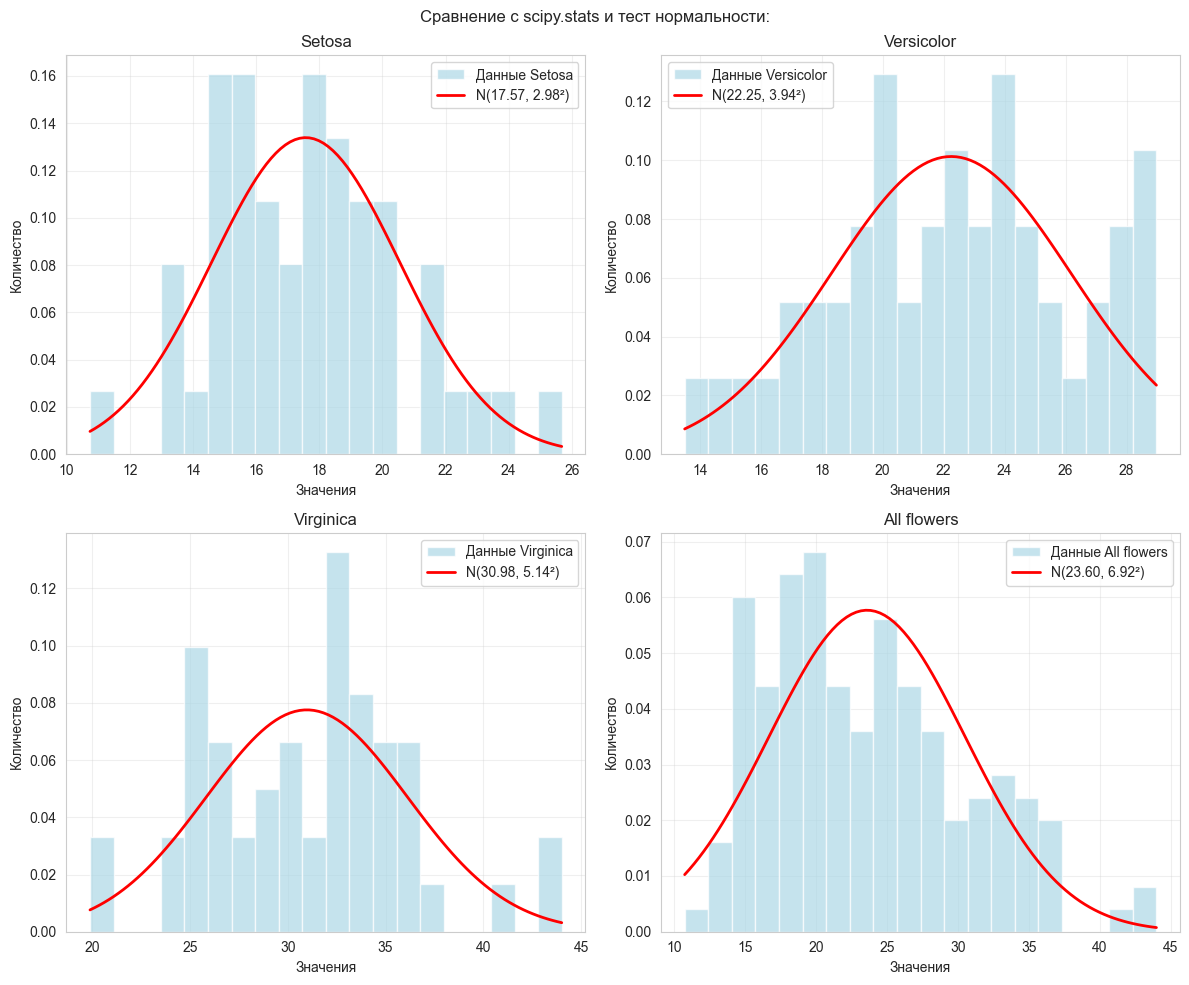

In [138]:
# Проверяем наши результаты с помощью scipy.stats
from scipy.stats import norm

# Создаем DataFrame для сравнения с scipy
scipy_comparison = []

for species, data in species_datasets.items():
    # Наши MLE оценки
    our_mu, our_sigma2 = mle_normal_params(data)
    our_sigma = np.sqrt(our_sigma2)
    
    # Оценки scipy (метод моментов, аналогичный MLE для больших выборок)
    scipy_mu, scipy_sigma = norm.fit(data)
    scipy_sigma2 = scipy_sigma ** 2
    
    # Статистика Колмогорова-Смирнова для проверки нормальности
    ks_statistic, ks_pvalue = sts.kstest(data, lambda x: norm.cdf(x, scipy_mu, scipy_sigma))
    
    scipy_comparison.append({
        'Species': species,
        'Our_μ̂': our_mu,
        'Scipy_μ̂': scipy_mu,
        'Diff_μ': abs(our_mu - scipy_mu),
        'Our_σ̂²': our_sigma2,
        'Scipy_σ̂²': scipy_sigma2,
        'Diff_σ²': abs(our_sigma2 - scipy_sigma2),
        'KS_statistic': ks_statistic,
        'KS_p_value': ks_pvalue,
        'Normal_test': 'Нормально' if ks_pvalue > 0.05 else 'Не нормально'
    })

scipy_df = pd.DataFrame(scipy_comparison)
print("")
display(scipy_df.round(6))

# Визуализация сравнения
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (species, data) in enumerate(species_datasets.items()):
    # plt.xlabel("")
    # plt.ylabel("Количество")
    if i < 4:
        mu, sigma = norm.fit(data)
        axes[i].hist(data, bins=20, density=True, alpha=0.7, color='lightblue', 
                    label=f'Данные {species}')
        
        axes[i].set_xlabel("Значения")      
        axes[i].set_ylabel("Количество")
          
        x = np.linspace(data.min(), data.max(), 100)
        axes[i].plot(x, norm.pdf(x, mu, sigma), 'r-', linewidth=2, 
                    label=f'N({mu:.2f}, {sigma:.2f}²)')
        
        axes[i].set_title(f'{species}')
        # axes[i].xla("Значения")
        # axes[i].ylabel("Количество")
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
plt.suptitle("Сравнение с scipy.stats и тест нормальности:")
# plt.xlabel("Количество")
plt.tight_layout()
plt.show()

Можем заметить, что подбор нормального распределения подошел для описания гистограмм

## Эксперимент

In [139]:
theta = area_all_flowers_sepal_petal.mean()
n_select = [20, 50, 100, 500, 1000]
M = 1000

mu_0 = area_all_flowers_sepal_petal.mean()
sigma_0 = area_all_flowers_sepal_petal.std()

results = []

for n in n_select:
    for i in range(M):
        sample = np.random.normal(loc=mu_0, scale=sigma_0, size=n)

        mu_hat = np.mean(sample)
        sigma_hat = np.std(sample) 

        results.append({'sample_size': n, 'mu_hat': mu_hat, 'sigma_hat': sigma_hat})

results_df = pd.DataFrame(results)
results_df

,sample_size,mu_hat,sigma_hat
0,20,10.278429,7.875581
1,20,12.897212,6.098301
2,20,10.039721,6.193059
3,20,11.144274,7.886854
4,20,11.775863,5.936546
...,...,...,...
4995,1000,11.703279,7.104017
4996,1000,11.738937,7.477140
4997,1000,12.083938,7.367082
4998,1000,11.786625,7.654907


In [121]:
sts_summary = []

for n in n_select:
    subset = results_df[results_df['sample_size'] == n]
    mean_mu_hat = subset['mu_hat'].mean()
    var_mu_hat = subset['mu_hat'].var()
    
    mean_sigma_hat = subset['sigma_hat'].mean()
    var_sigma_hat = subset['sigma_hat'].var()


    sts_summary.append({
        "Среднее(μ̂)": f"{mean_mu_hat:.3f}",
        "Смещение(μ̂)": f"{mean_mu_hat - mu_0:.4f}",
        "Дисперсия(μ̂)": f"{var_mu_hat:.4f}",
        "Среднее(σ̂)": f"{mean_sigma_hat:.3f}",
        "Смещение(σ̂)": f"{mean_sigma_hat - sigma_0:.4f}",
        "Дисперсия(σ̂)": f"{var_sigma_hat:.4f}"
        })
sts_summary_df = pd.DataFrame(data=sts_summary)
sts_summary_df

,Среднее(μ̂),Смещение(μ̂),Дисперсия(μ̂),Среднее(σ̂),Смещение(σ̂),Дисперсия(σ̂)
0,11.842,0.0420,2.7290,6.971,-0.3038,1.2512
1,11.794,-0.0058,1.0555,7.172,-0.1035,0.5595
2,11.802,0.0024,0.5385,7.206,-0.0691,0.2626
3,11.793,-0.0070,0.1122,7.264,-0.0110,0.0544
4,11.801,0.0009,0.0520,7.267,-0.0082,0.0265


c:\Users\KDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.



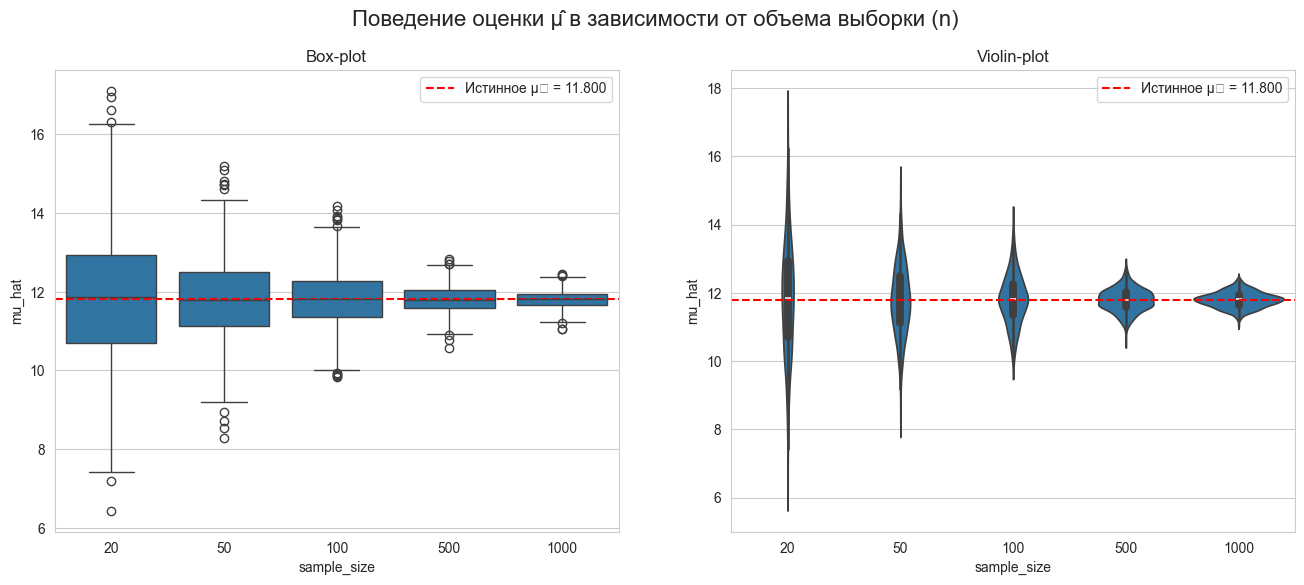

In [118]:
sns.set_style("whitegrid")

# Box-plot и Violin-plot для оценки μ̂
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Поведение оценки μ̂ в зависимости от объема выборки (n)', fontsize=16)

sns.boxplot(ax=axes[0], x='sample_size', y='mu_hat', data=results_df)
axes[0].axhline(mu_0, color='r', linestyle='--', label=f'Истинное μ₀ = {mu_0:.3f}')
axes[0].set_title('Box-plot')
axes[0].legend()

sns.violinplot(ax=axes[1], x='sample_size', y='mu_hat', data=results_df)
axes[1].axhline(mu_0, color='r', linestyle='--', label=f'Истинное μ₀ = {mu_0:.3f}')
axes[1].set_title('Violin-plot')
axes[1].legend()

plt.show()

c:\Users\KDO\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.



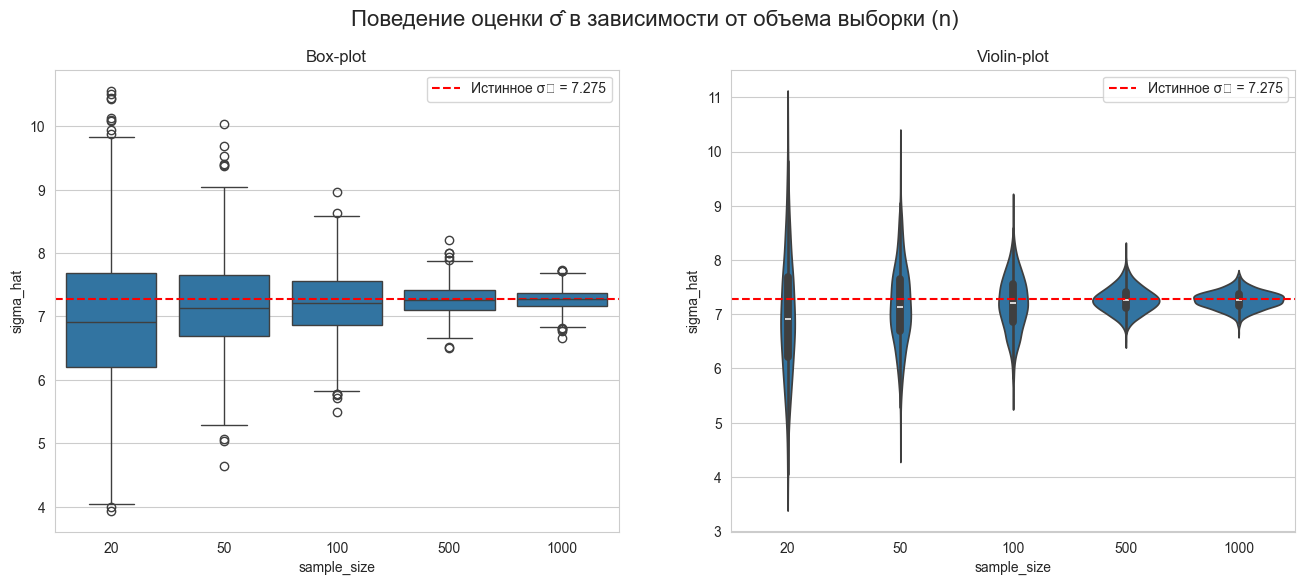

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Поведение оценки σ̂ в зависимости от объема выборки (n)', fontsize=16)

sns.boxplot(ax=axes[0], x='sample_size', y='sigma_hat', data=results_df)
axes[0].axhline(sigma_0, color='r', linestyle='--', label=f'Истинное σ₀ = {sigma_0:.3f}')
axes[0].set_title('Box-plot')
axes[0].legend()

sns.violinplot(ax=axes[1], x='sample_size', y='sigma_hat', data=results_df)
axes[1].axhline(sigma_0, color='r', linestyle='--', label=f'Истинное σ₀ = {sigma_0:.3f}')
axes[1].set_title('Violin-plot')
axes[1].legend()

plt.show()


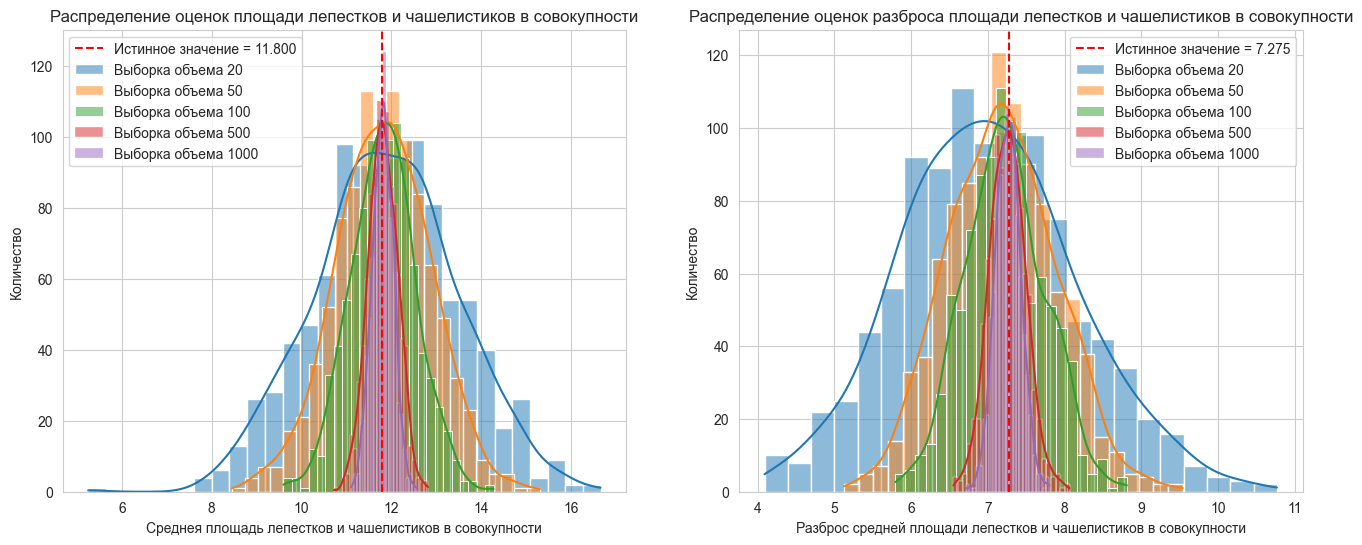

In [153]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for n in n_select:
    
    hist_subset = results_df[results_df['sample_size'] == n]
    
    # axes[0].label_outer(lan)
    sns.histplot(ax=axes[0], data=hist_subset, x='mu_hat', label=f"Выборка объема {n}", kde=True)
    # axes[0].legend()
    sns.histplot(ax=axes[1], data=hist_subset, x='sigma_hat',label=f"Выборка объема {n}" , kde=True)

axes[0].set_title('Распределение оценок площади лепестков и чашелистиков в совокупности')
axes[0].axvline(mu_0, color='r', linestyle='--', label=f'Истинное значение = {mu_0:.3f}')
axes[0].set_xlabel("Среднея площадь лепестков и чашелистиков в совокупности")
axes[0].set_ylabel("Количество")
axes[0].legend()

axes[1].set_title('Распределение оценок разброса площади лепестков и чашелистиков в совокупности')
axes[1].axvline(sigma_0, color='r', linestyle='--', label=f'Истинное значение = {sigma_0:.3f}')
axes[1].set_xlabel("Разброс средней площади лепестков и чашелистиков в совокупности")
axes[1].set_ylabel("Количество")
axes[1].legend()

plt.show()